# Cодержание  
 - 1. Изучение данных из файла и предобработка  
   - 1.1. Осмотр данных
   - 1.2. Предобработка данных
 - 2. Обучение модели без учета дисбаланса классов
 - 3. Выбор модели с учетом дисбаланса классов
   - 3.1. Изменение размера выборки
 - 4. Общий вывод

# Отток клиентов

Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.  
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.  

**Описание данных:**  
*Признаки:*  
RowNumber — индекс строки в данных  
CustomerId — уникальный идентификатор клиента  
Surname — фамилия  
CreditScore — кредитный рейтинг  
Geography — страна проживания  
Gender — пол  
Age — возраст  
Tenure — сколько лет человек является клиентом банка  
Balance — баланс на счёте  
NumOfProducts — количество продуктов банка, используемых клиентом  
HasCrCard — наличие кредитной карты  
IsActiveMember — активность клиента  
EstimatedSalary — предполагаемая зарплата  
*Целевой признак:*  
Exited — факт ухода клиента  

Для выполнения поставленной задачи необходимо построить модель с значением F1-меры выше 0.59.  

## Изучение данных из файла и предобработка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [2]:
warnings.filterwarnings('ignore')

In [3]:
try:
    df = pd.read_csv('Churn.csv')
except:
    df = pd.read_csv('/datasets/Churn.csv')

### Осмотр данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Сразу отмечаем, что пропуски имеются только в одном столбце.

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Названия столбцов не соответствуют хорошему стилю.

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Глядя на эту таблицу можно сразу выделить нужные нам количественные признаки.

### Предобработка данных

In [7]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

Приведем названия столбцов к хорошему стилю.

In [8]:
df.columns = df.columns.str.lower()

In [9]:
df = df.rename(columns={'rownumber': 'row_number', 'customerid': 'customer_id', 'creditscore': 'credit_score', 'numofproducts': 'num_of_products', 'hascrcard': 'has_cr_card', 
                        'isactivemember': 'is_active_member', 'estimatedsalary': 'estimated_salary'}) 

In [10]:
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

Проверим данные на явные дубликаты.

In [11]:
df.duplicated().sum()

0

Категориальные признаки необходимо преобразовать в численные.  
Сделаем это техникой прямого кодирования One-Hot Encoding, поскольку она работает со всеми моделями. 

In [12]:
df['gender'] = pd.get_dummies(df['gender'], drop_first=True)

In [13]:
df = pd.concat([df, pd.get_dummies(df['geography'], drop_first=True)], axis=1)

In [14]:
# приводим новые столбцы к нижнему регистру
df.columns = df.columns.str.lower()

Часть столбцов содержит данные никак не помогающих нашему исследованию.  
Избавимся от них, вместе со столбцом 'geography', данные из которого перешли в два новых столбца.

In [15]:
df = df.drop(columns={'geography', 'row_number', 'customer_id', 'surname'}, axis=1)

Единственный столбец с пропусками - 'tenure'.  
Поскольку очевидного варианта для заполнения прощенных значений у нас нет, удалим строки с пропусками, предварительно созранив их в отдельную переменную.

In [16]:
tenure_nan = df[df['tenure'].isna()]

In [17]:
df.shape

(10000, 12)

In [18]:
df.drop(df[df['tenure'].isna()].index, inplace=True)

In [19]:
df.shape

(9091, 12)

In [20]:
df['exited'].value_counts(normalize=True)

0    0.796062
1    0.203938
Name: exited, dtype: float64

Виден сильный дисбаланс в целевом признаке, в дальнейшем это необходимо учесть.

## Обучение модели без учета дисбаланса классов

Делим датасет на признаки, целевой - данные из столбца 'exited'.

In [21]:
features = df.drop('exited', axis=1)
target = df['exited']

Разбиваем данные на три выборки: обкчающую, валидационную и тестовую.  
Соотношение 3:1:1

In [22]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.2, random_state=12345)
features_train, features_test, target_train, target_test = train_test_split(features_train, target_train, test_size=0.25, random_state=12345)

In [23]:
display(features_train.shape)
display(features_valid.shape)
display(features_test.shape)

(5454, 11)

(1819, 11)

(1818, 11)

Проверим три модели:  
 - Дерево решений DecisionTreeClassifier;
 - Случайный лес RandomForestClassifier;
 - Логистическая регрессия LogisticRegression.

In [24]:
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
display('best result', best_result)
display('best depth', best_depth)

'best result'

0.5948406676783005

'best depth'

9

In [25]:
best_model = None
best_result = 0
best_depth = 0
for est in range(70, 130, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth
display('best result', best_result)
display('best est', best_est)
display('best depth', best_depth)

'best result'

0.5385996409335727

'best est'

110

'best depth'

9

In [26]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
result = f1_score(target_valid, predictions_valid)
display('result', result)

'result'

0.02624671916010499

Единственной моделью показавшей достаточный результат, оказалось дерево решений с глубиной равной 9.  
Для чистоты эксперимента, проверим эту модель на тестовой выборке.

In [27]:
model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
result = f1_score(target_test, predictions_test)
result

0.5560675883256528

In [28]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.8029894402392301

Не самый плохой результат, но стоит взглянуть на график ROC-кривой.

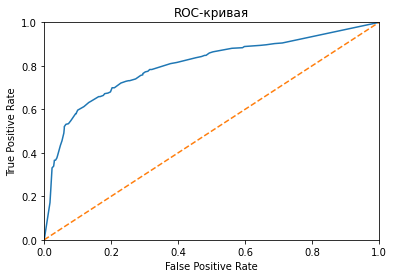

In [29]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

График AUC-ROC говорит о том, что мы на верном пути, однако принимать эту модель явно рано.
Результат неплохой, но недостаточный для успешного выполнения задачи.  
Необходимо уделить больше внимания гиперпараметрам и выравниванию классов.

## Выбор модели с учетом дисбаланса классов.

В первую очередь, при разделении на выборки, добавим параметр 'stratify', это поможет сохранить соотношение классов в выборках.

In [30]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.2, random_state=12345, stratify=target)
features_train, features_test, target_train, target_test = train_test_split(features_train, target_train, test_size=0.25, random_state=12345, stratify=target_train)

In [31]:
display(features_train.shape)
display(features_valid.shape)
display(features_test.shape)

(5454, 11)

(1819, 11)

(1818, 11)

Далее, проведем масштабировние количественных признаков.  
Для этого применим StandardScaler.

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(features_train[numeric])

StandardScaler()

In [34]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Снова проверим те же три вида моделей.

In [35]:
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
display('best result', best_result)
display('best depth', best_depth)

'best result'

0.5691823899371069

'best depth'

7

In [36]:
best_model = None
best_result = 0
best_depth = 0
for est in range(70, 130, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth
display('best result', best_result)
display('best est', best_est)
display('best depth', best_depth)

'best result'

0.6043405676126878

'best est'

70

'best depth'

9

In [37]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
result = f1_score(target_valid, predictions_valid)
display('result', result)

'result'

0.33918128654970764

Качество дерева решений упало, но зато выросли метрики случайного леса, его и попробуем протестировать на третьей выборке.  

Совместим обучающую и валидационную выборки.

In [38]:
#features_train = features_train.append(features_valid)
#target_train = target_train.append(target_valid)

In [39]:
model = RandomForestClassifier(n_estimators = 70, max_depth=9, random_state=12345)
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
result = f1_score(target_test, predictions_test)
result

0.5597147950089126

Недостаточный результат, требуется доработка.

Проверим метрику AUC-ROC для нашей модели.

In [40]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.8606740778246043

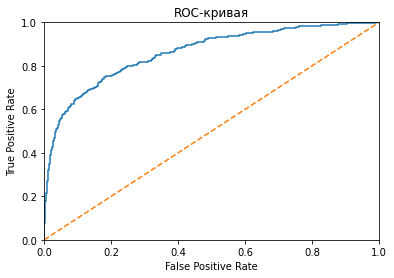

In [41]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

Качество модели повысилось, но потенциал для роста явно имеется.  

Попробуем как увеличить, так и уменьшить выборку. 

### Изменение размера выборки

При осмотре данных, мы получили соотношение 80/20 в целевом признаке.  
Увеличим количество положительных исходов в 4 раза для первой выборки.

In [42]:
# изобретать ничего не стал, те же функции , что и в тренажере.
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

И оставим только четверть отрицательных исходов для второй.

In [43]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

По обеим выборкам, проведем поиск модели случайного леса.  

In [44]:
best_model = None
best_result = 0
best_depth = 0
for est in range(70, 130, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth
display('best result', best_result)
display('best est', best_est)
display('best depth', best_depth)

'best result'

0.6233766233766234

'best est'

110

'best depth'

9

In [45]:
best_model = None
best_result = 0
best_depth = 0
for est in range(70, 130, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth
display('best result', best_result)
display('best est', best_est)
display('best depth', best_depth)

'best result'

0.6019210245464247

'best est'

90

'best depth'

9

Возьмем модель с лучшим результатом, а именно случайный лес из 110 деревьев и глубиной 9 для увеличенной выборки.

In [46]:
features_train = features_train.append(features_valid)
target_train = target_train.append(target_valid)
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [47]:
model = RandomForestClassifier(n_estimators = 110, max_depth=9, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predictions_test = model.predict(features_test)
result = f1_score(target_test, predictions_test)
result

0.6032863849765258

Отлично, на всякий случай еще раз проверим AUC-ROC.

In [48]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.9435786510997602

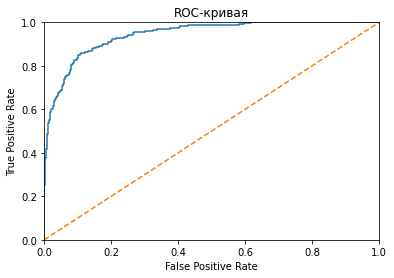

In [49]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

Нужная модель готова!

## Общий вывод

Предоставленный датасет содержит достаточный объем данных для выполнения поставленной задачи.  
Часть признаков, таких как фамилия и id клиента были отброшены, категориальные признаки были приведены к численному формату.  
От части данных пришлось отказаться, поскольку нет четкого варианта заполнения пропусков в одном из столбцов, доля этих данных не достигает 10%, поэтому их потеря не критична для исследования.  
Изначально выбор модели был проведен без учета дисбаланса классов и не дал желаемых результатов.  
Далее была проведена стратификация при разделении выборок и масштабирование признаков, однако результат всё еще был недостаточным.  
Необходимое значение F1 было получено после увеличения выборки положительных значений, метрика AUC-ROC подтвердила качество модели.